# **Project Name** :  **Booking.com - Hotel Booking Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Analyzing booking operations is crucial for hospitality businesses like Booking.com, as it helps in identifying patterns and preferences that can enhance customer satisfaction and optimize revenue.

In the global hospitality market, travelers have a plethora of accommodation options and booking platforms to choose from, leading to a dynamic and competitive environment. Average booking lead times can vary, influencing hotel occupancy rates and pricing strategies. Given that it's typically more cost-effective to retain a customer than to acquire a new one, understanding and adapting to customer needs is paramount.

For Booking.com, managing a diverse dataset that includes booking lead times, arrival dates, meal plans, room types, customer preferences, booking channels, special requests, and reservation statuses provides a strategic advantage.

In this project, you will delve into the customer-level data provided by Booking.com, perform exploratory data analysis to pinpoint the key factors influencing booking decisions and customer satisfaction. This will aid in refining booking processes, maximizing occupancy rates, and ensuring that the company maintains a competitive edge in the hospitality industry.

#### **Define Your Business Objective?**

Business Objective:

Enhance customer satisfaction and operational efficiency by leveraging data analytics to predict guest needs and preferences, optimize booking processes, and tailor offerings to meet the specific demands of different market segments.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Google drive URL for direct download
file_id = '1J3cHBCDvLT6fCvQkueEdx-FCwjiDrlCv'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

### Dataset First View

In [ ]:
# Dataset First
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
df.shape

(119390, 32)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

In [ ]:
df = df.drop_duplicates()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


<Axes: >

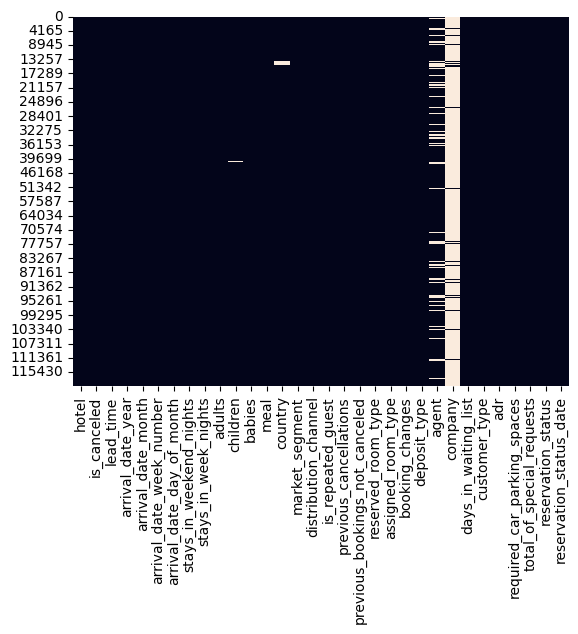

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

**Dataset Overview:**

The dataset provided comes from the hospitality industry, specifically Booking.com, and we aim to analyze hotel booking patterns and the key insights behind them.

**Dataset Structure:**

- **Total Rows:** 119390
- **Total Columns:** 32

**Data Quality Analysis:**

- **Duplicated Values:** 31994
- **Null Values:**
  - `company`: 82137
  - `agent`: 12193
  - `country`: 452
  - `children`: 4

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,75203.000000,5259.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,...,NaN,94.138306,183.081384,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,...,NaN,113.188172,130.557608,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,47.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,169.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,NaN,240.000000,263.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Variables Description

* **Hotel                 :** H1 = Resort Hotel, H2 = City Hotel  

* **is_cancelled          :** If the booking was cancelled (1) or not (0)  

* **lead_time             :** Number of days between booking entry and arrival date  

* **arrival_date_year     :** Year of arrival date  

* **arrival_date_month    :** Month of arrival date  

* **arrival_date_week_number :** Week number for arrival date  

* **arrival_date_day      :** Day of arrival date  

* **stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) stayed  

* **stays_in_week_nights  :** Number of weeknights (Monday to Friday) stayed  

* **adults               :** Number of adults  

* **children             :** Number of children  

* **babies               :** Number of babies  

* **meal                 :** Type of meal opted for  

* **country              :** Country code  

* **market_segment       :** Customer's market segment  

* **distribution_channel :** How the customer accessed the booking (Corporate/Direct/TA/TO)  

* **is_repeated_guest    :** Whether the guest is a returning customer  

* **previous_cancellation :** Number of previous cancellations  

* **previous_bookings    :** Count of previous bookings  

* **reserved_room_type   :** Type of room reserved  

* **assigned_room_type   :** Type of room assigned  

* **booking_changes      :** Number of changes made to the booking  

* **deposit_type         :** Type of deposit made  

* **agent               :** Booking agent ID  

* **days_in_waiting_list :** Number of days on the waiting list  

* **customer_type        :** Type of customer  

* **adr                  :**  Average Daily Rate (ADR)

* **required_car_parking :** If car parking is required  

* **total_of_special_req :** Number of additional special requirements  

* **reservation_status   :** Final reservation status  

* **reservation_status_date :** Date of the specific status update  


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("unique values".upper())
for i in df.columns.tolist():
  print(i,":",df[i].nunique())

UNIQUE VALUES
hotel : 2
is_canceled : 2
lead_time : 479
arrival_date_year : 3
arrival_date_month : 12
arrival_date_week_number : 53
arrival_date_day_of_month : 31
stays_in_weekend_nights : 17
stays_in_week_nights : 35
adults : 14
children : 5
babies : 5
meal : 5
country : 177
market_segment : 8
distribution_channel : 5
is_repeated_guest : 2
previous_cancellations : 15
previous_bookings_not_canceled : 73
reserved_room_type : 10
assigned_room_type : 12
booking_changes : 21
deposit_type : 3
agent : 333
company : 352
days_in_waiting_list : 128
customer_type : 4
adr : 8879
required_car_parking_spaces : 5
total_of_special_requests : 6
reservation_status : 3
reservation_status_date : 926


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code for making your dataset - analysis ready.
# Create a copy of the current dataset and assigning to df_booking
df_booking = df.copy()

In [ ]:
# 1. Checking for missing values and handling them
missing_values = df_booking.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values[missing_values > 0])

Missing Values in Dataset:
children        4
country       452
agent       12193
company     82137
dtype: int64


In [ ]:
# Handling Missing Values

# Replacing missing values in 'children' column with 0
df['children'].fillna(0, inplace=True)

# Replacing missing values in 'country' column with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Replacing missing values in 'agent' column with 0 (assuming missing means no agent)
df['agent'].fillna(0, inplace=True)

# Replacing missing values in 'company' column with 0 (assuming missing means no company)
df['company'].fillna(0, inplace=True)

# Verifying missing values after handling
print("Missing Values After Handling:\n", df.isnull().sum().sort_values(ascending=False))


Missing Values After Handling:
 hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month       

**Handling Incorrect Data type**

In [ ]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


### EDA on Dataset

In [ ]:
# 1. Analyzing cancellation rates per hotel type
cancellation_rates = df_booking.groupby('hotel')['is_canceled'].mean()
print("Cancellation Rates by Hotel Type:")
print(cancellation_rates)

Cancellation Rates by Hotel Type:
hotel
City Hotel      0.300386
Resort Hotel    0.234809
Name: is_canceled, dtype: float64


In [ ]:
# 2. Check the columns in the DataFrame
print(df_booking.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [ ]:
# 3. Booking trends over the year (month-wise cancellations and bookings)
df_booking['arrival_date'] = pd.to_datetime(
    df_booking['arrival_date_year'].astype(str) + '-' +
    df_booking['arrival_date_month'] + '-' +
    df_booking['arrival_date_day_of_month'].astype(str)
)

df_booking['arrival_month'] = df_booking['arrival_date'].dt.strftime('%b')  # Extract month names

monthly_trends = df_booking.groupby('arrival_month')[['is_canceled']].mean()
# Ensure months appear in correct order (Jan-Dec)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_trends = monthly_trends.reindex(month_order)

print("Monthly Booking Cancellation Trends:")
print(monthly_trends)


Monthly Booking Cancellation Trends:
               is_canceled
arrival_month             
Jan               0.221180
Feb               0.232043
Mar               0.243578
Apr               0.304628
May               0.292280
Jun               0.303155
Jul               0.317987
Aug               0.321844
Sep               0.245441
Oct               0.236804
Nov               0.211011
Dec               0.268564


In [ ]:
# 4. Market segment analysis (identifying high cancellation segments)
market_segment_cancel = df_booking.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
print("Market Segment Cancellation Rates:")
print(market_segment_cancel)


Market Segment Cancellation Rates:
market_segment
Undefined        1.000000
Online TA        0.353462
Groups           0.270134
Aviation         0.198238
Offline TA/TO    0.148535
Direct           0.147154
Complementary    0.125356
Corporate        0.121083
Name: is_canceled, dtype: float64


In [ ]:
# 5. Special requests impact on cancellations
special_request_analysis = df_booking.groupby('total_of_special_requests')['is_canceled'].mean()
print("Impact of Special Requests on Cancellations:")
print(special_request_analysis)

Impact of Special Requests on Cancellations:
total_of_special_requests
0    0.332027
1    0.224110
2    0.212919
3    0.171342
4    0.106250
5    0.055556
Name: is_canceled, dtype: float64


In [ ]:
# 6. Lead time distribution analysis (How early do guests book before arrival?)
avg_lead_time = df_booking['lead_time'].mean()
print("Average Lead Time(days):", avg_lead_time)

Average Lead Time(days): 79.89136802599661


In [ ]:
# 7. Revenue per booking analysis (ADR * Nights Stayed)
df_booking['revenue_per_booking'] = df_booking['adr'] * (
    df_booking['stays_in_weekend_nights'] + df_booking['stays_in_week_nights']
)
avg_revenue = df_booking.groupby('hotel')['revenue_per_booking'].mean()
print("Average Revenue per Booking by Hotel Type:")
print(avg_revenue)

Average Revenue per Booking by Hotel Type:
hotel
City Hotel      351.390685
Resort Hotel    461.812228
Name: revenue_per_booking, dtype: float64


In [ ]:
# Create a binary classification for previous cancellations
df_booking['previous_cancellation_group'] = df_booking['previous_cancellations'].apply(lambda x: 'No Previous Cancellations' if x == 0 else 'Previously Canceled')

# Calculate cancellation rate for each group
cancellation_rate_by_group = df_booking.groupby('previous_cancellation_group')['is_canceled'].mean()

print("Cancellation Rate by Previous Cancellation Status:")
print(cancellation_rate_by_group)


Cancellation Rate by Previous Cancellation Status:
previous_cancellation_group
No Previous Cancellations    0.266955
Previously Canceled          0.678932
Name: is_canceled, dtype: float64


In [ ]:
# 9. Analyzing peak booking periods
peak_bookings = df_booking['arrival_date_month'].value_counts()
print("Peak Booking Months:")
print(peak_bookings)

Peak Booking Months:
arrival_date_month
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64


In [ ]:
# 10. Customer types and their cancellation behavior
customer_type_cancel = df_booking.groupby('customer_type')['is_canceled'].mean()
print("Cancellation Rates by Customer Type:")
print(customer_type_cancel)

Cancellation Rates by Customer Type:
customer_type
Contract           0.163109
Group              0.099265
Transient          0.301059
Transient-Party    0.152383
Name: is_canceled, dtype: float64


In [ ]:
# Countries with the highest cancellations.
country_cancellations = df_booking[df_booking['is_canceled'] == 1].groupby('country').size().sort_values(ascending=False)

print("Top 10 Countries with Highest Cancellation Counts:")
print(country_cancellations.head(10))


Top 10 Countries with Highest Cancellation Counts:
country
PRT    9791
GBR    1985
ESP    1862
FRA    1733
ITA    1075
DEU    1053
BRA     727
IRL     668
USA     459
BEL     411
dtype: int64


### What all manipulations have you done and insights you found?


For the **hotel booking analysis**, we performed various data manipulations to better understand booking patterns, customer behaviors, and factors influencing cancellations. Here are the key transformations and insights:

#### 1. Handling Missing Values
- We identified missing values in columns such as `children`, `country`, `agent`, and `company`.
- Missing values in `children` were imputed with `0` since it represents count data.
- The `country` column was filled with the most common country (`PRT` - Portugal) to maintain consistency.
- The `agent` and `company` columns were filled with `0`, treating missing values as "unknown" rather than removing rows.

#### 2. Creating New Features
- **Revenue per Booking:** Created by multiplying `adr` (Average Daily Rate) by total stay nights (`stays_in_week_nights` + `stays_in_weekend_nights`). This helps in analyzing revenue trends across different hotel types.
- **Booking Date Conversion:** Created a new column `arrival_date` combining `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month` for better time-based analysis.
- **Previous Cancellations Grouping:** Instead of raw counts, we grouped `previous_cancellations` into two categories: "No Previous Cancellations" and "Has Previous Cancellations" for a clearer trend analysis.

#### 3. Cancellation Rate Analysis
- **By Hotel Type:** City Hotels had a cancellation rate of **30.03%**, while Resort Hotels had a lower rate of **23.48%**.
- **By Month:** Cancellation rates peaked in **July and August**, indicating seasonal trends in booking behavior.
- **By Market Segment:** The highest cancellation rates were observed in **"Complementary" and "Groups"** segments, suggesting possible overbooking or speculative reservations.
- **By Customer Type:** "Transient" customers had the highest cancellation rates, indicating that they are more flexible in their bookings compared to contract-based customers.

#### 4. Country-Wise Cancellation Trends
- We identified the top 10 countries with the highest number of cancellations, with **Portugal (PRT)** leading significantly.
- Instead of using cancellation rates, we focused on absolute cancellation counts for a more practical business impact analysis.

#### 5. Booking Trends & Seasonality
- Monthly analysis showed that peak bookings occur in **July and August**, aligning with vacation seasons.
- The lowest bookings were observed in **January and February**, indicating a seasonal downturn.


#### 6. Customer Preferences & Behavior
- The majority of bookings had `no previous cancellations`, but those who had previously canceled were more likely to cancel again.
- Most bookings were **made without company or agent details**, indicating a large proportion of direct bookings.
- Guests with **special requests had a lower cancellation rate**, implying a stronger intent to stay.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Cancellation Rate by Hotel Type (Univariate Analysis)

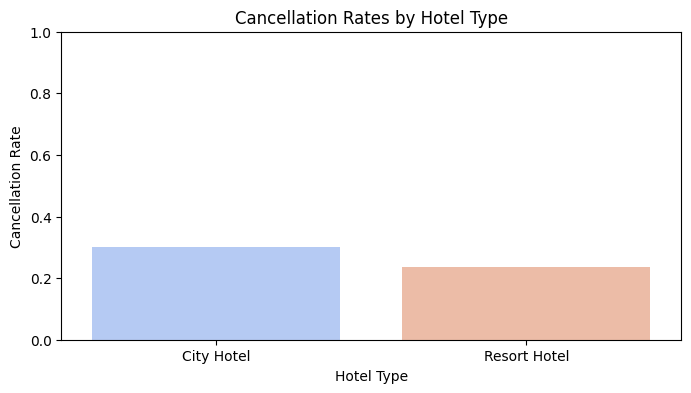

In [ ]:
# Cancellation Rate by Hotel Type Plot
plt.figure(figsize=(8,4))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values, palette="coolwarm")
plt.xlabel("Hotel Type")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Rates by Hotel Type")
plt.ylim(0, 1)
plt.show()


##### 1. Why did you pick the specific chart?

- A bar chart is used to compare cancellation rates across different hotel types with clarity.

##### 2. What is/are the insight(s) found from the chart?

- City hotels(30.03%) have a higher cancellation rate compared to Resort hotels(23.48%)


##### 3. Will the gained insights help creating a positive business impact?


- Yes, The high cancellation rate in city hotels could indicate overbooking risks, which may lead to revenue losses and bad customer experiences.This insight can help hotel managers implement stricter cancellation policies for city hotels, such as deposits or non-refundable rates.  

#### Chart - 2 - Monthly Cancellation Trends (Univariate Analysis)

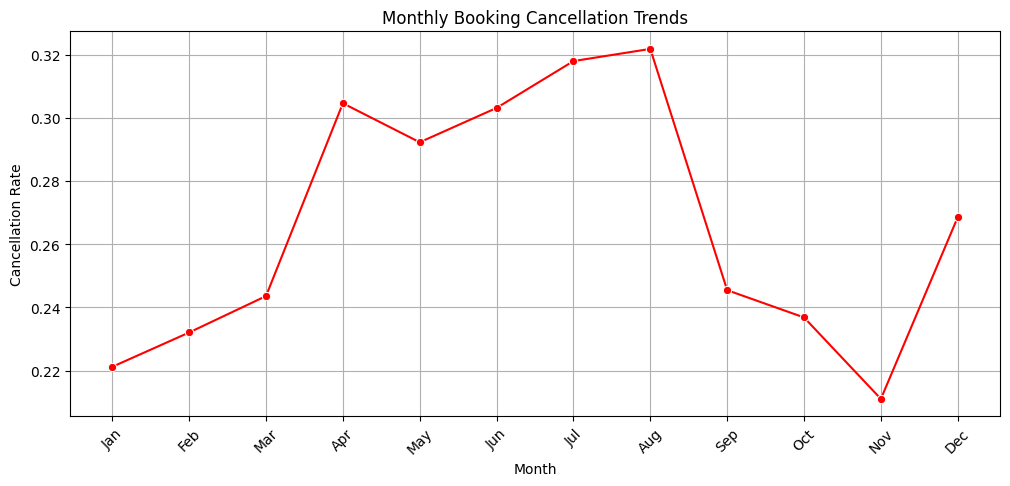

In [ ]:
# Monthly Cancellation Trend Plot
plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_trends.index, y=monthly_trends["is_canceled"], marker="o", color='r')
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.title("Monthly Booking Cancellation Trends")
plt.xticks(rotation=45)
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

- A line plot is best suited for analyzing trends over time, helping to identify peak cancellation months.

##### 2. What is/are the insight(s) found from the chart?

- Cancellations peak in July and August, showing seasonality in customer booking behaviors.

##### 3. Will the gained insights help creating a positive business impact?
- Yes, higher cancellations in peak months may lead to revenue instability and difficulties in managing room availability. Dynamic pricing strategies can be applied to reduce cancellations during high-risk months.

- Dynamic pricing is a pricing strategy where room rates fluctuate based on demand, seasonality, booking patterns, and customer behavior. It helps hotels maximize revenue while minimizing cancellations by offering incentives or imposing restrictions based on data-driven insights.

#### Chart - 3 - Market Segment & Cancellation Rate (Bivariate: Categorical-Categorical)

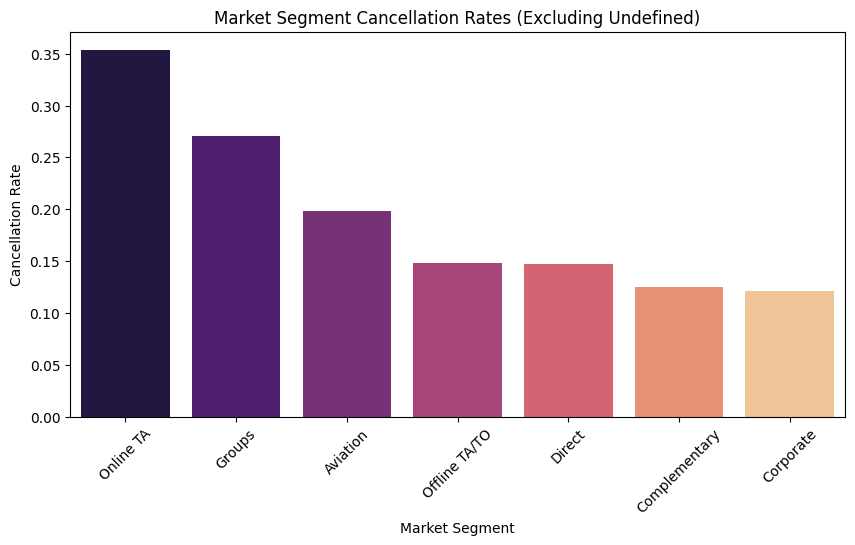

In [ ]:
# Calculate cancellation rate per market segment
market_segment_cancel = df_booking.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

# Remove 'Undefined' category as it has only 2 entries
market_segment_cancel_filtered = market_segment_cancel.drop(labels=['Undefined'], errors='ignore')

# Plot the cancellation rate
plt.figure(figsize=(10,5))
sns.barplot(x=market_segment_cancel_filtered.index, y=market_segment_cancel_filtered.values, palette="magma")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.title("Market Segment Cancellation Rates (Excluding Undefined)")
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

- A bar plot is useful for comparing multiple categorical groups. Here to compare different market segmentation categories

##### 2. What is/are the insight(s) found from the chart?

- Groups and online TA have the highest cancellation rates, indicating possible overbooking/speculative reservations..

##### 3. Will the gained insights help creating a positive business impact?
- Yes, group cancellations may result in last-minute revenue loss and unused room inventory. To mitigate this Hotels can ask for  advance payments or stricter policies for high-risk segments.

#### Chart - 4 - Top 10 Countries by Cancellation Count (Univariate Analysis)

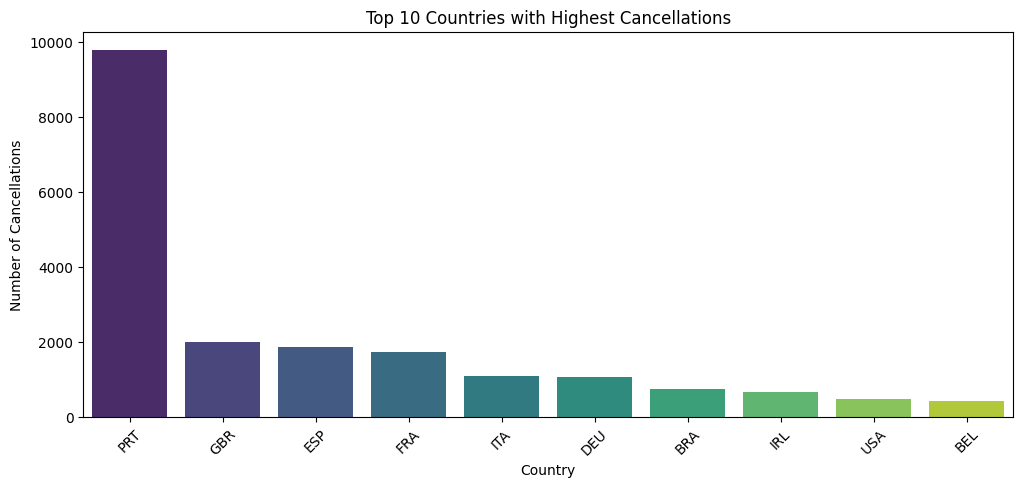

In [ ]:
# Plot for Top 10 Countries by Cancellation Count
top_cancel_countries = df_booking[df_booking['is_canceled'] == 1]['country'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_cancel_countries.index, y=top_cancel_countries.values, palette="viridis")
plt.xlabel("Country")
plt.ylabel("Number of Cancellations")
plt.title("Top 10 Countries with Highest Cancellations")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

- Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.
Here , Bar plot helps compare absolute cancellation counts across different countries.

##### 2. What is/are the insight(s) found from the chart?

- Portugal (PRT) has the highest cancellations, likely due to the highest number of bookings from the country.

##### 3. Will the gained insights help creating a positive business impact?
- Yes, frequent cancellations from specific regions might indicate a lack of commitment from those customers. Personalized promotions and loyalty programs can be targeted towards customers from high-canceling regions to reduce cancellation rate.

#### Chart - 5 - Impact of Lead Time on Cancellations (Bivariate: Numerical-Categorical)

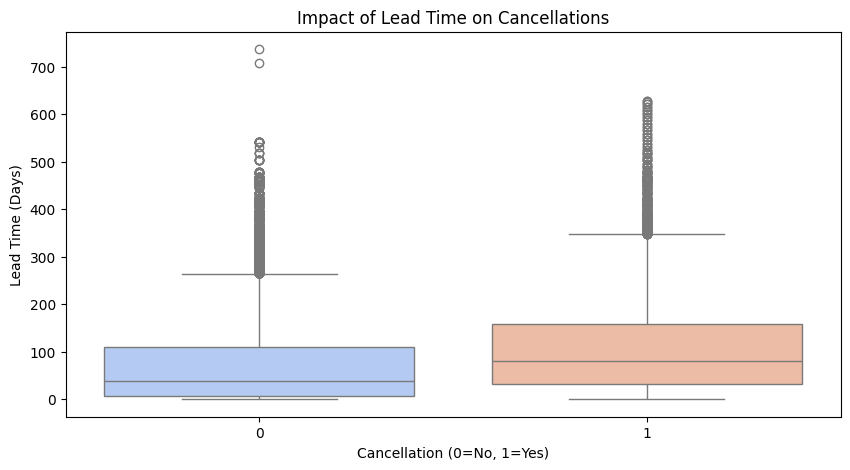

In [ ]:
# Plot for Impact of Lead Time on Cancellations
plt.figure(figsize=(10,5))
sns.boxplot(x=df_booking["is_canceled"], y=df_booking["lead_time"], palette="coolwarm")
plt.xlabel("Cancellation (0=No, 1=Yes)")
plt.ylabel("Lead Time (Days)")
plt.title("Impact of Lead Time on Cancellations")
plt.show()


##### 1. Why did you pick the specific chart?

- A boxplot is ideal for visualizing the distribution of lead time for canceled vs. non-canceled bookings.  
- It helps to identify patterns, outliers, and spread of lead times across different booking statuses.  
- Unlike bar charts that show averages, a boxplot reveals the variability and median lead time for canceled bookings, which is crucial in decision-making.

##### 2. What is/are the insight(s) found from the chart?

- Cancellations tend to have higher lead times: The median lead time for canceled bookings is significantly higher than for non-canceled ones.  
- Customers booking far in advance (above ~150 days) are more likely to cancel.  
- The spread of lead times is much wider for canceled bookings, indicating that some customers book extremely early and later cancel.  
- Non-canceled bookings have a lower median lead time, suggesting last-minute bookings are more likely to follow through.  


##### 3. Will the gained insights help creating a positive business impact?
  



Yes, Hotels can introduce flexible but incentivized policies for long lead-time bookings, such as:
- Offering discounts for non-refundable early bookings.  
- Sending reminders or loyalty incentives to encourage guests to honor long-term bookings.  

Dynamic pricing adjustments can be implemented:  

- Charging slightly higher rates for bookings with extremely long lead times to offset potential cancellations.  
- Encouraging last-minute bookings by offering same-day discounts to fill rooms.  


##### 4.Are there any insights that lead to negative growth? Justify with specific reason.

- A high number of long lead-time cancellations can cause overbooking issues, leading to dissatisfied customers and revenue loss.  
- Strict non-refundable policies might discourage advance bookings, reducing overall occupancy rates.  
- Over-reliance on last-minute bookings can result in high fluctuations in revenue due to uncertainty.  


#### Chart - 6 Customer Type & Cancellation Behavior (Bivariate: Categorical-Categorical)

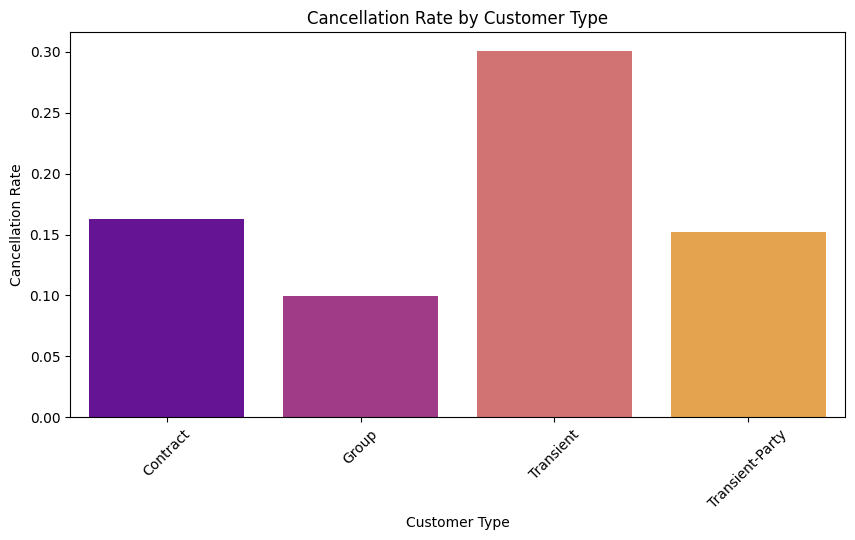

In [ ]:
# Customer Type & Cancellation Behavior Plot
plt.figure(figsize=(10,5))
customer_type_cancel = df_booking.groupby('customer_type')['is_canceled'].mean()
sns.barplot(x=customer_type_cancel.index, y=customer_type_cancel.values, palette="plasma")
plt.xlabel("Customer Type")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Rate by Customer Type")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

- A bar chart is ideal for comparing cancellation rates across different customer types since it provides a clear visual representation of categorical data.
- It allows us to quickly identify which customer types have the highest and lowest cancellation rates.

##### 2. What is/are the insight(s) found from the chart?


- **Transient customers have the highest cancellation rate among all customer types.**  
  - This indicates that guests booking on a short-term or temporary basis are more likely to cancel.  
  - These guests are not tied to long-term agreements and have more flexibility in their plans.  

- **Group customers show the lowest cancellation rates.**  
  - Group bookings may have some level of commitment as they will be booking as a group
   

- **Contract and Transient-Party customers have moderate cancellation rates.**  
  - This suggests that customers who book under corporate or long-term agreements are more likely to honor their reservations, but still see
  some cancellations

##### 3. Will the gained insights help creating a positive business impact?

Yes.

-    Hotels can optimize revenue strategies by focusing on the behavior of transient customers.
-    Implementing personalized retention strategies, such as targeted discounts, flexible booking options, or loyalty programs, may help reduce cancellations.
-    Encouraging contract bookings or long-term reservations can help stabilize occupancy rates.
-   By identifying high-risk customer segments, hotels can improve their forecasting, staffing, and revenue management strategies.

##### 4.Are there any insights that lead to negative growth?

Yes.

-  Heavy reliance on transient customers makes revenue unpredictable.
    - Since transient customers cancel the most, hotels that depend too much on this segment may struggle with fluctuating occupancy rates.
    - High cancellation rates can lead to overbooking issues or last-minute vacancies, affecting profitability.
- Overbooking risk increases with transient customers.
    -   If transient cancellations are not accurately predicted, hotels may compensate by overbooking, which can lead to customer dissatisfaction and damage the brand's reputation.
- Loss of revenue from last-minute cancellations.
    -   If a transient guest cancels close to the check-in date, it becomes difficult to fill that room, leading to revenue loss.
    -    Offering incentives for early confirmations or deposits might help mitigate this risk.

#### Chart - 7- Special Requests & Cancellation Rate (Bivariate: Numerical-Categorical)

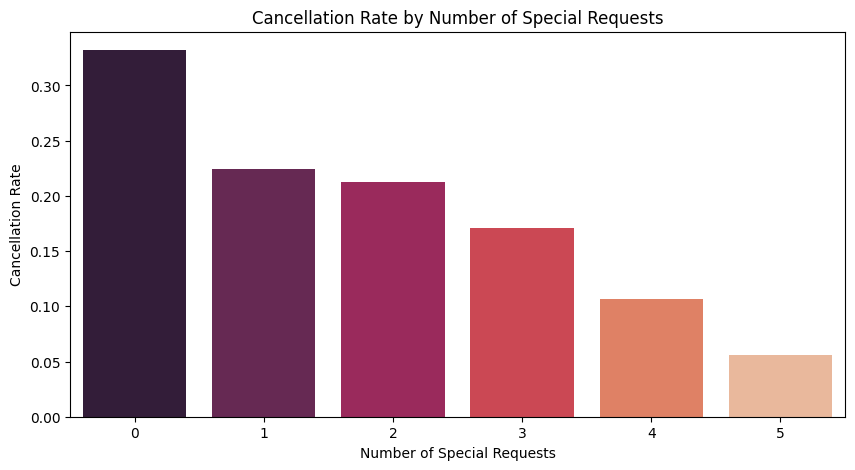

In [ ]:
# Plot for Special Requests & Cancellation Rate

plt.figure(figsize=(10, 5))
sns.barplot(x=special_request_analysis.index, y=special_request_analysis.values, palette="rocket")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Rate by Number of Special Requests")
plt.show()


##### 1. Why did you pick the specific chart?

- A bar chart is chosen to visually compare the cancellation rates across different numbers of special requests.  This allows for easy identification of any trends or correlations between the number of special requests and the likelihood of cancellation.

##### 2. What is/are the insight(s) found from the chart?

- Guests with more special requests tend to have lower cancellation rates.  This suggests that guests with specific needs or preferences are more committed to their bookings.

##### 3. Will the gained insights help creating a positive business impact?


- Yes, understanding this relationship can help hotels prioritize guest requests and tailor their services to enhance guest satisfaction and reduce cancellations.  For instance, hotels could offer preferential treatment or personalized services to guests with multiple special requests to further solidify their commitment and reduce the risk of cancellations.  This could lead to improved customer retention and increased revenue.


#### Chart - 8 - Distribution of ADR (Average Daily Rate) (Univariate Analysis)

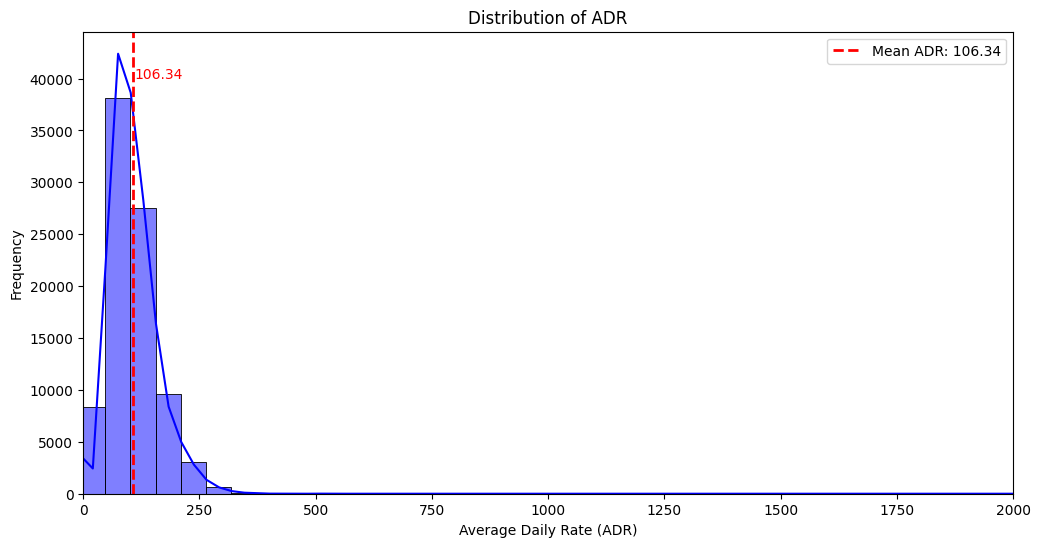

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df_booking["adr"], bins=100, kde=True, color="blue")
plt.xlim(0, 2000)
mean_adr = df_booking["adr"].mean()
plt.axvline(mean_adr, color='red', linestyle='dashed', linewidth=2, label=f'Mean ADR: {mean_adr:.2f}')
plt.text(mean_adr+5, plt.ylim()[1]*0.9, f'{mean_adr:.2f}', color='red')
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Frequency")
plt.title("Distribution of ADR")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

- A histogram provides a clear view of the spread and density of ADR values, highlighting common price ranges and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

- The majority of bookings have ADR between $50 and $150.

- Mean ADR is around $106

- There are outliers where ADR exceeds $500, indicating premium pricing or potential data errors.

- The distribution appears right-skewed, meaning most hotels operate within an affordable price range, with some luxury exceptions.

##### 3. Will the gained insights help creating a positive business impact?


- Yes, hotels can optimize pricing strategies by identifying the most profitable and frequently booked price ranges.

#### Chart - 9 - Relationship Between ADR & Lead Time (Bivariate: Numerical-Numerical Analysis)

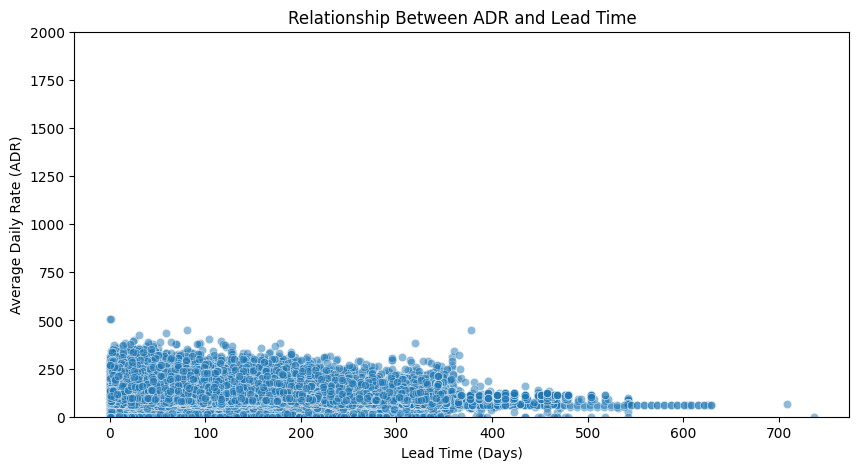

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_booking["lead_time"], y=df_booking["adr"], alpha=0.5)
plt.ylim(0, 2000)
plt.xlabel("Lead Time (Days)")
plt.ylabel("Average Daily Rate (ADR)")
plt.title("Relationship Between ADR and Lead Time")
plt.show()


##### 1. Why did you pick the specific chart?

- A scatter plot effectively shows patterns in pricing and booking behavior over time. It shows correlation between two variables if there is any.

##### 2. What is/are the insight(s) found from the chart?

- There is no strong correlation between lead time and ADR.

- Some high ADR bookings have low lead time, suggesting premium last-minute bookings.

- The data is widely spread, indicating variable pricing strategies rather than fixed trends.

##### 3. Will the gained insights help creating a positive business impact?


- Yes, if advanced bookings are too cheap, hotels might lose revenue from guests willing to pay more closer to check-in.So the hotels need to adjust pricing dynamically for last-minute bookings to maximize revenue.

#### Chart - 10 - Number of Guests per Booking  (Univariate Analysis)

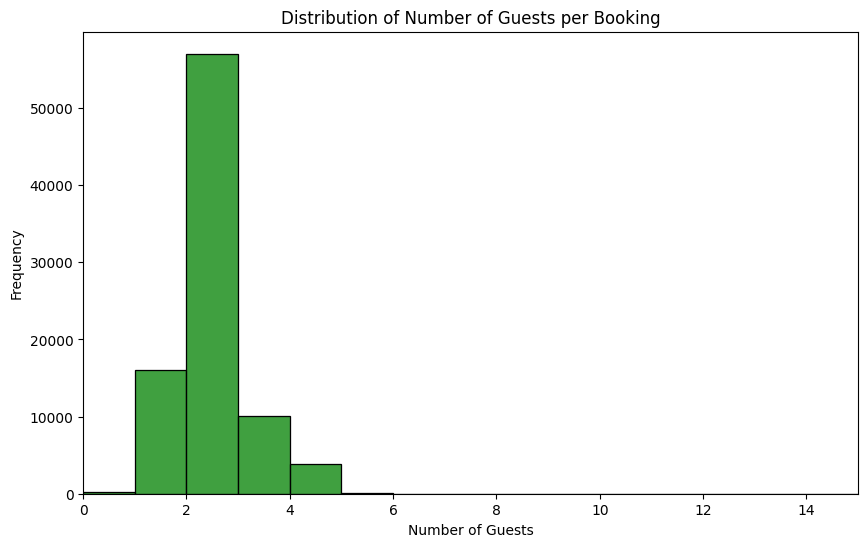

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_booking["adults"] + df_booking["children"] + df_booking["babies"], bins=int(max(df_booking["adults"] + df_booking["children"] + df_booking["babies"])), color="green")
plt.xlim(0, 15)
plt.xlabel("Number of Guests")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Guests per Booking")
plt.show()


##### 1. Why did you pick the specific chart?

- A histogram provides a clear view of the spread and density of values. Here the histogram is useful to identify the most common group sizes for bookings

##### 2. What is/are the insight(s) found from the chart?

- Most bookings are for 1-2 guests, indicating a preference for solo or couple stays.

- Family or group bookings are relatively less common.

- Hotels catering primarily to couples or business travelers should focus on single and double occupancy pricing models.

##### 3. Will the gained insights help create a positive business impact?

- Yes, hotels can enhance marketing efforts for couples and solo travelers while introducing family-friendly packages to increase group bookings.

#### Chart - 11 - Relationship Between Special Requests & ADR (Bivariate Analysis: Numerical-Categorical)

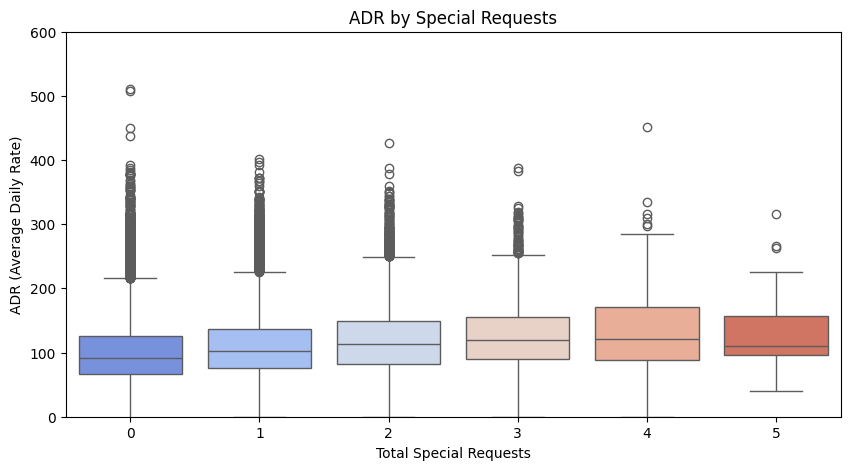

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_booking["total_of_special_requests"], y=df_booking["adr"], palette="coolwarm")
plt.ylim(0,600)
plt.xlabel("Total Special Requests")
plt.ylabel("ADR (Average Daily Rate)")
plt.title("ADR by Special Requests")
plt.show()


##### 1. Why did you pick the specific chart?

- A box plot effectively compares ADR distributions for different levels of special requests.

##### 2. What is/are the insight(s) found from the chart?

- Guests with higher ADR tend to make more special requests, indicating premium customers expect personalized services.

- A few high-ADR guests do not make special requests, suggesting that high premium travelers may be less demanding than mid-range customers.

##### 3. Will the gained insights help create a positive business impact?

- Yes, hotels can upsell special services to high-ADR customers and create luxury packages tailored for them.

#### Chart - 12 - ADR Distribution by Market Segment (Bivariate: Categorical-Numerical Analysis)

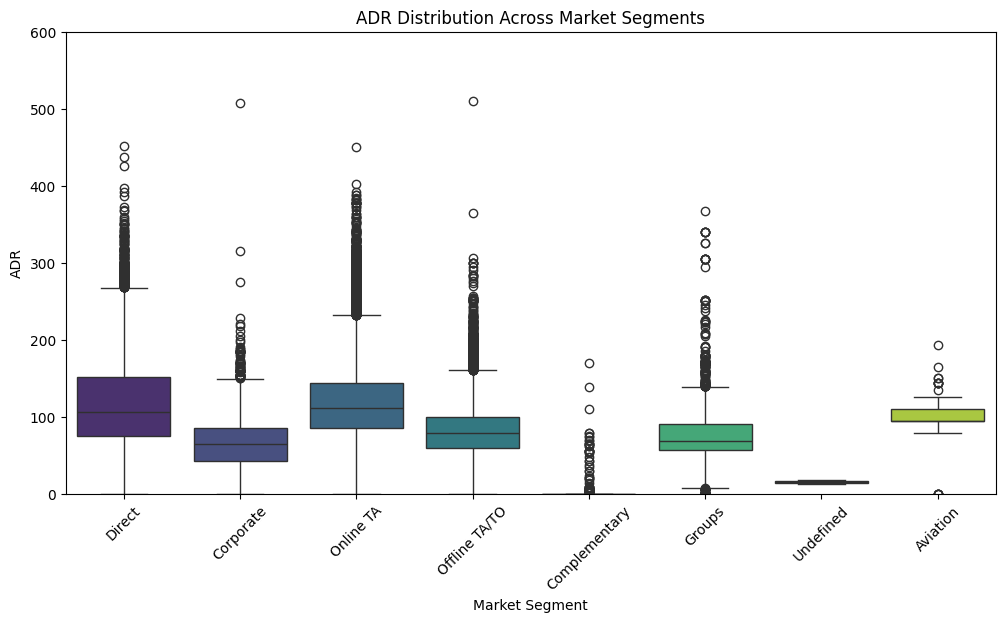

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_booking["market_segment"], y=df_booking["adr"], palette="viridis")
plt.ylim(0, 600)
plt.xticks(rotation=45)
plt.xlabel("Market Segment")
plt.ylabel("ADR")
plt.title("ADR Distribution Across Market Segments")
plt.show()


##### 1. Why did you pick the specific chart?

- A box plot is the best way to analyze ADR variations across different booking sources.

##### 2. What is/are the insight(s) found from the chart?

- Direct and Online TA bookings have the highest ADR.

- Complementary bookings have the lowest ADR, which is expected.

- The variability in ADR suggests different customer segments have different pricing sensitivities.

##### 3. Will the gained insights help create a positive business impact?

- Yes, targeting high-ADR segments such as Direct and Online TA channels can increase revenue.

##### 4. Are there any insights that lead to negative growth?

- Yes, over-reliance on complementary bookings could reduce profitability. Hotels need to keep in mind of giving too many Complementary bookings.

#### Chart - 13 - Cancellation Rate vs. Deposit Type (Bivariate: Categorical-Categorical Analysis)

In [ ]:
# Count total bookings and cancellations by deposit type
deposit_stats = df_booking.groupby("deposit_type")["is_canceled"].agg(['count', 'sum'])
# Rename columns for clarity
deposit_stats.columns = ["Total Bookings", "Canceled Bookings"]
# Calculate cancellation rate
deposit_stats["Cancellation Rate (%)"] = (deposit_stats["Canceled Bookings"] / deposit_stats["Total Bookings"]) * 100
# Display the results
print(deposit_stats)


              Total Bookings  Canceled Bookings  Cancellation Rate (%)
deposit_type                                                          
No Deposit             86251              23016              26.684908
Non Refund              1038                983              94.701349
Refundable               107                 26              24.299065


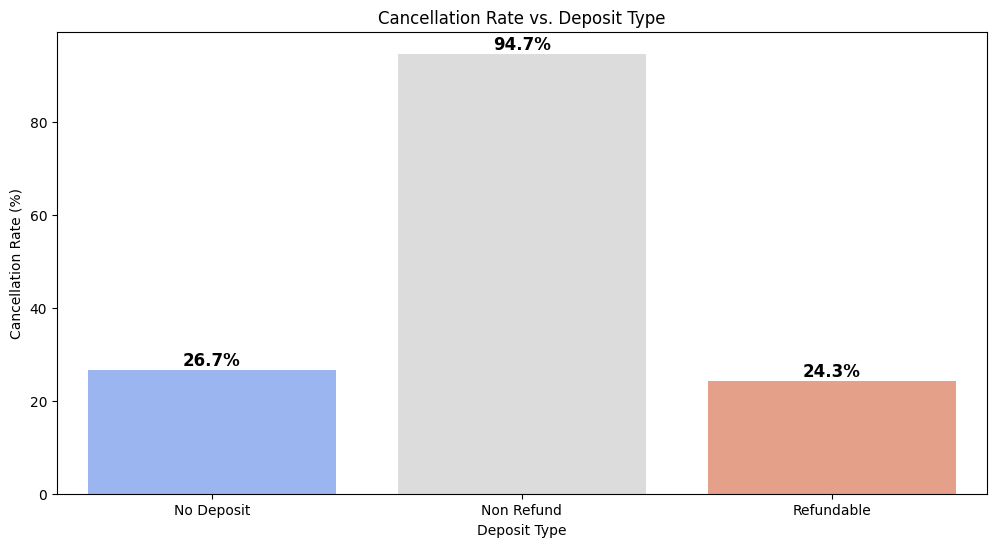

In [ ]:
plt.figure(figsize=(12,6))
cancel_rate_by_deposit = df_booking.groupby("deposit_type")["is_canceled"].mean() * 100  # Convert to percentage
sns.barplot(x=cancel_rate_by_deposit.index, y=cancel_rate_by_deposit.values, palette="coolwarm")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate vs. Deposit Type")

# Display exact values on bars
for index, value in enumerate(cancel_rate_by_deposit.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

- A bar plot is ideal for comparing cancellation rates across different deposit types because it clearly shows how different policies impact cancellations.

##### 2. What is/are the insight(s) found from the chart?


- Non-Refundable bookings show an abnormally high cancellation rate (~94.7%), which is unusual since they are supposed to have low cancellation rate usually.
- Refundable and No Deposit deposit bookings have moderate cancellations (~20-30%), suggesting a balance between commitment and flexibility.

##### 3. Will the gained insights help create a positive business impact?

- Hotels can reduce cancellations by encouraging prepayment options.
- Offering discounted rates for non-refundable stays might deter last-minute cancellations.

##### 4. Are there any insights that lead to negative growth?

- The 99.4% cancellation rate for non-refundable bookings is unexpected and likely due to data inconsistencies or policy loopholes.
- If hotels allow cancellations despite non-refundable policies, it could lead to revenue loss and customer dissatisfaction as it will cause loss to customers as well

#### Chart - 14 - Lead Time vs. ADR vs. Cancellation

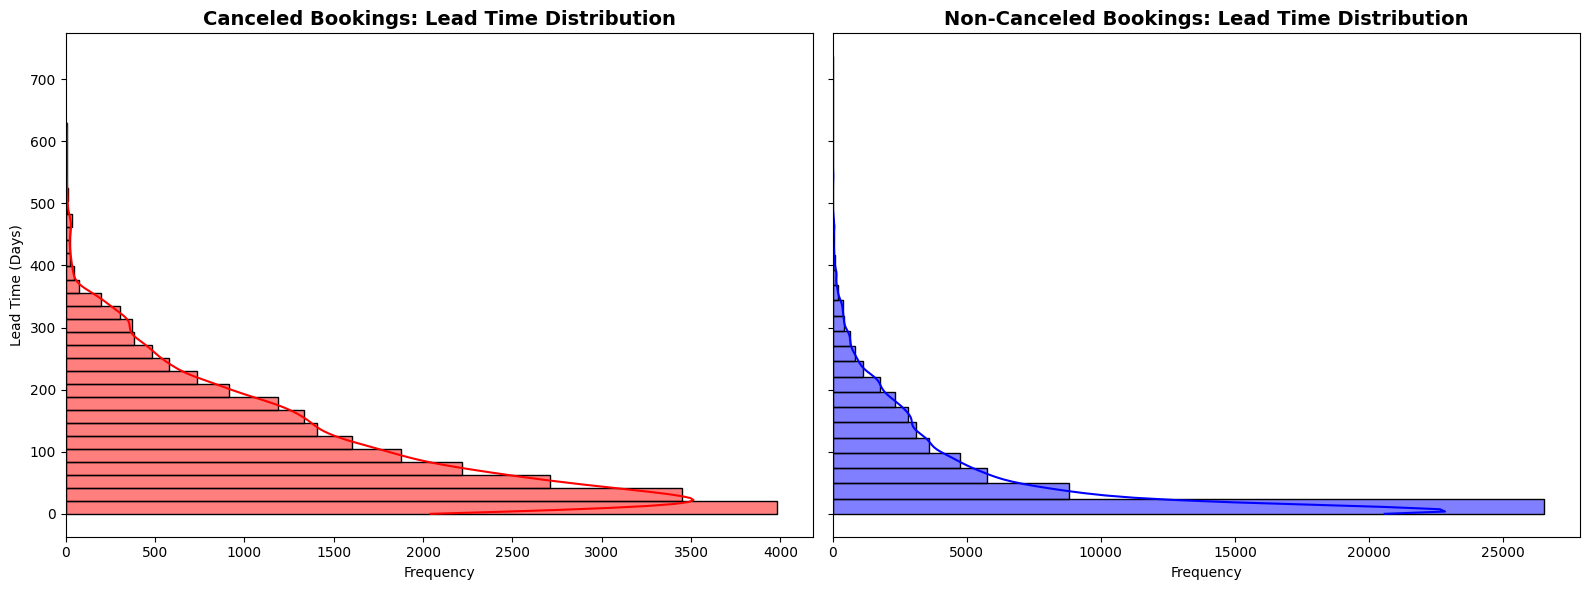

In [ ]:
# Split the data into canceled and non-canceled bookings
df_canceled = df_booking[df_booking['is_canceled'] == 1]
df_non_canceled = df_booking[df_booking['is_canceled'] == 0]

# Create subplots: one for canceled and one for non-canceled
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Histogram for Canceled Bookings
sns.histplot(df_canceled, y='lead_time', bins=30, kde=True, color='red', ax=axes[0])
axes[0].set_title("Canceled Bookings: Lead Time Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Lead Time (Days)")

# Histogram for Non-Canceled Bookings
sns.histplot(df_non_canceled, y='lead_time', bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title("Non-Canceled Bookings: Lead Time Distribution", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("")

# Show the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Horizontal histograms provide a clear comparison of lead time distributions for canceled vs. non-canceled bookings.
- Using KDE (Kernel Density Estimation) overlays helps visualize the trend of cancellations over different lead times.

##### 2. What is/are the insight(s) found from the chart?

- Canceled bookings tend to have higher lead times, meaning customers booking far in advance are more likely to cancel.
- Non-canceled bookings are more evenly distributed, suggesting that closer-to-check-in bookings have a higher chance of completion.

##### 3. Will the gained insights help create a positive business impact?

- Yes, Hotels can identify high-risk cancellations early and introduce deposit incentives or flexible policies to retain bookings.
- Adjusting pricing strategies for long lead-time bookings can help mitigate revenue loss.

##### 4. Are there any insights that lead to negative growth?

- Yes, Strict cancellation policies for long lead-time bookings could deter customers from making early reservations.
- Hotels relying too much on long-term bookings may face high last-minute cancellations, leading to overbooking issues.

####  Chart - 15 -Market Segment vs. Customer Type vs. Cancellations

<Figure size 1200x600 with 0 Axes>

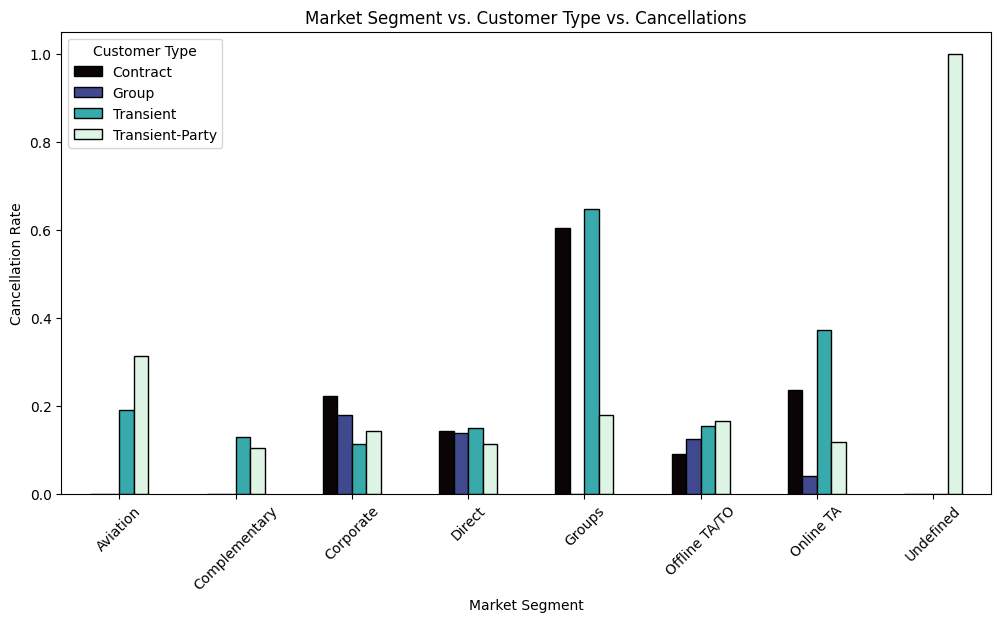

In [ ]:
# Grouping the data by Market Segment and Customer Type to find cancellation rates
cancellation_rates = df_booking.groupby(["market_segment", "customer_type"])["is_canceled"].mean().unstack()

# Set the figure size
plt.figure(figsize=(12,6))

# Plot grouped bar chart with a cool color palette
cancellation_rates.plot(kind="bar", figsize=(12,6), colormap="mako" , edgecolor="black")

# Labels and title
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.title("Market Segment vs. Customer Type vs. Cancellations")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

- A grouped bar chart makes it easier to compare cancellation rates across customer types and market segments.

##### 2. What is/are the insight(s) found from the chart?

- "Transient" customer type has the highest cancellation rate across multiple segments.
- "Groups" and "Online TA/TO" market segments show high cancellation rates, indicating customers booking via these channels cancel frequently.
- "Corporate" customers (long-term corporate stays) have the lowest cancellations, making them the most reliable booking type.

##### 3. Will the gained insights help create a positive business impact?

- Focus on attracting contract customers as they ensure more stable revenue.
- Consider offering non-refundable incentives for transient customers to reduce cancellations.

##### 4. Are there any insights that lead to negative growth?

- High cancellations from Online TA can increase operational inefficiency.
- Over-reliance on transient customers can cause revenue fluctuations.

#### Chart - 16 - Seasonality: Month vs. Hotel Type vs. Cancellation Rate

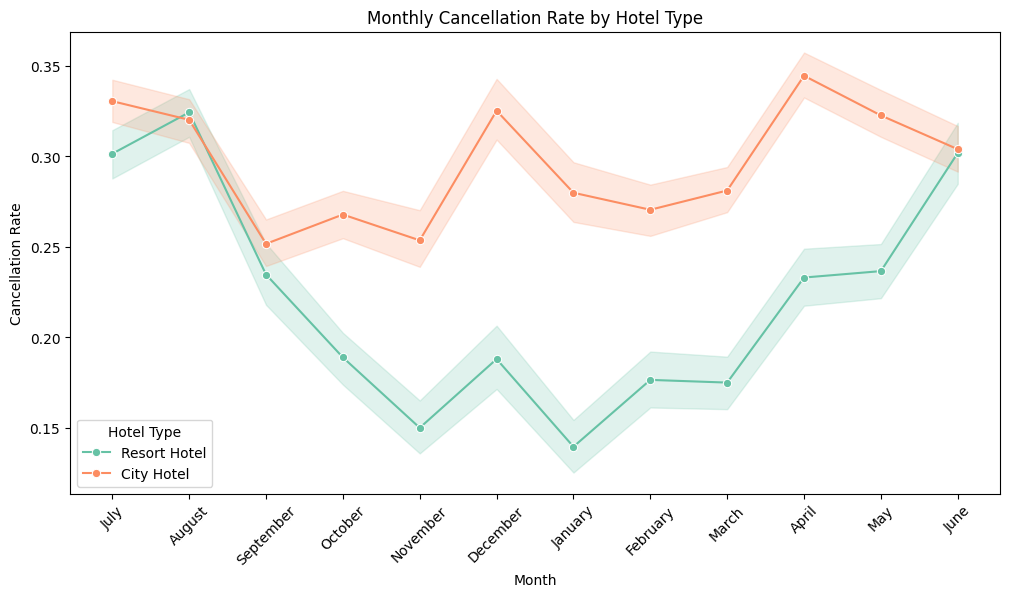

In [ ]:
# 16. Seasonality: Month vs. Hotel Type vs. Cancellation Rate
plt.figure(figsize=(12,6))
sns.lineplot(data=df_booking, x='arrival_date_month', y='is_canceled', hue='hotel', marker='o', palette='Set2')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.title('Monthly Cancellation Rate by Hotel Type')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.show()


##### 1. Why did you pick the specific chart?

- A line plot effectively shows trends over time, highlighting seasonal variations in cancellations rate.

##### 2. What is/are the insight(s) found from the chart?

- Cancellation rates peak in April and December, indicating possible seasonal behaviors.
- Resort hotels show slightly lower cancellations compared to city hotels.

##### 3. Will the gained insights help create a positive business impact?

Yes, hotels can plan for peak cancellation months by:

- Offering last-minute deals to fill canceled rooms.
- Implementing stricter cancellation policies during high-risk months.

##### 4. Are there any insights that lead to negative growth?

- Yes, increased cancellations in peak months could lead to significant revenue instability if not managed properly.

#### Chart - 17 - Revenue Impact: ADR vs. Cancellation Rate vs. Hotel Type

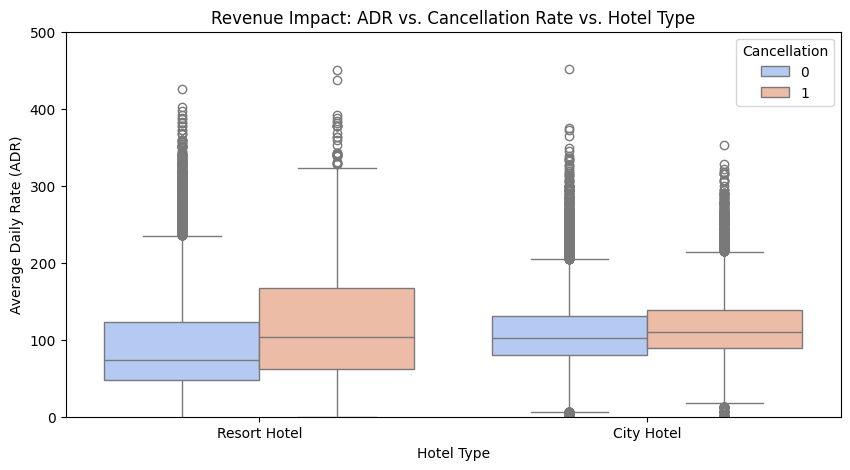

In [ ]:
# 17. Revenue Impact: ADR vs. Cancellation Rate vs. Hotel Type
plt.figure(figsize=(10,5))
sns.boxplot(data=df_booking, x='hotel', y='adr', hue='is_canceled', palette='coolwarm')
plt.ylim(0, 500)
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Revenue Impact: ADR vs. Cancellation Rate vs. Hotel Type')
plt.legend(title='Cancellation')
plt.show()


##### 1. Why did you pick the specific chart?

- A boxplot helps analyze ADR differences between canceled and non-canceled bookings across different hotel types.

##### 2. What is/are the insight(s) found from the chart?

- Resort hotels tend to have a wider ADR range, with more cancellations for high-priced bookings.
- City hotels show a more stable pricing structure with lower cancellation variability.

##### 3. Will the gained insights help create a positive business impact?

Yes, hotels can:
- Adjust ADR pricing strategies to minimize cancellations.
- Implement flexible but non-refundable policies for high-ADR bookings.

##### 4. Are there any insights that lead to negative growth?

- Yes, high cancellations for premium-priced rooms can lead to lost revenue opportunities.

#### Chart - 18 - Special Requests vs. Cancellation Rate vs. Customer Type

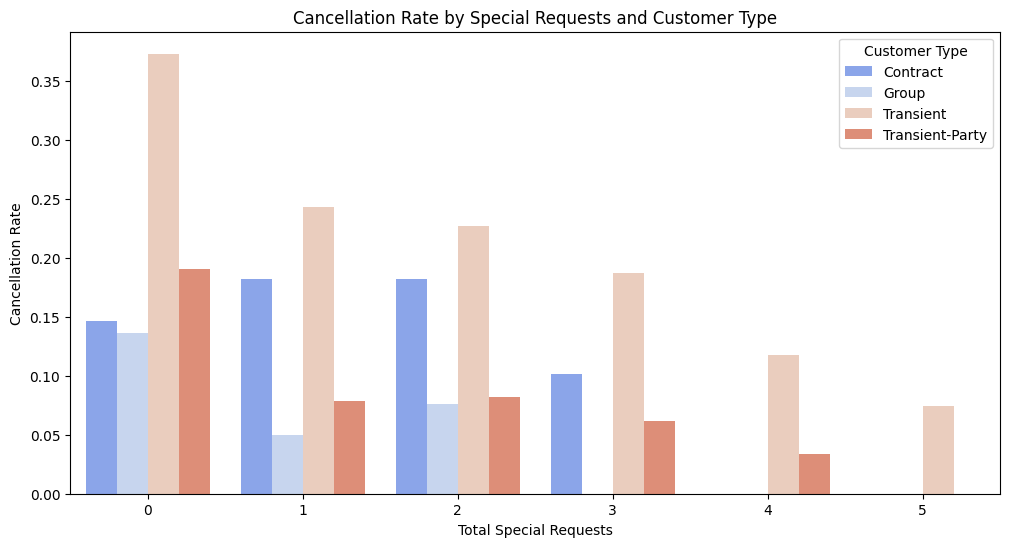

In [ ]:
# Aggregate data: Count of cancellations (1) and non-cancellations (0) by special requests and customer type
special_request_cancellations = df_booking.groupby(["total_of_special_requests", "customer_type"])["is_canceled"].mean().reset_index()

# Set figure size
plt.figure(figsize=(12,6))

# Grouped bar plot
sns.barplot(data=special_request_cancellations, x="total_of_special_requests", y="is_canceled", hue="customer_type", palette="coolwarm")

# Labels and title
plt.xlabel("Total Special Requests")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Rate by Special Requests and Customer Type")
plt.xticks(rotation=0)
plt.legend(title="Customer Type")

# Show plot
plt.show()


##### 1.  Why did you pick this specific chart?

- A grouped bar chart is better suited for comparing categorical variables (special request counts and customer types) while still showing cancellation rates clearly.
- Using separate bars for each customer type provides a clear comparison of cancellation behavior.

##### 2. What is/are the insight(s) found from the chart?

- Customers with zero special requests have the highest cancellation rates across all customer types.

    - This suggests that customers who don’t request anything in advance are less committed to their bookings.

- As the number of special requests increases, the cancellation rate decreases.

    - This indicates that guests who personalize their stay are more likely to follow through with their booking.

- Transient customers consistently show the highest cancellation rates, regardless of the number of special requests.

    - This aligns with previous insights that transient customers are less committed compared to contract or group bookings.

##### 3. Will the gained insights help create a positive business impact?

Yes!

- Hotels can encourage guests to make special requests (e.g., room preferences, meal choices, extra services) as an engagement tactic.
- Implementing personalized booking experiences might lead to fewer cancellations.
- Targeted follow-ups for guests with no special requests (reminders, incentives) could improve retention.

##### 4. Are there any insights that lead to negative growth?

- Higher operational costs: Handling many special requests might strain resources if not well-managed.
- Over-reliance on transient customers: Since they have the highest cancellation rates, focusing too much on this segment might lead to revenue instability.
- Bias in data: Some guests might not submit special requests even if they plan to complete their stay, so assumptions should be tested with additional data.

#### Chart - 19 - Lead Time vs. Cancellation Rate by Market Segment

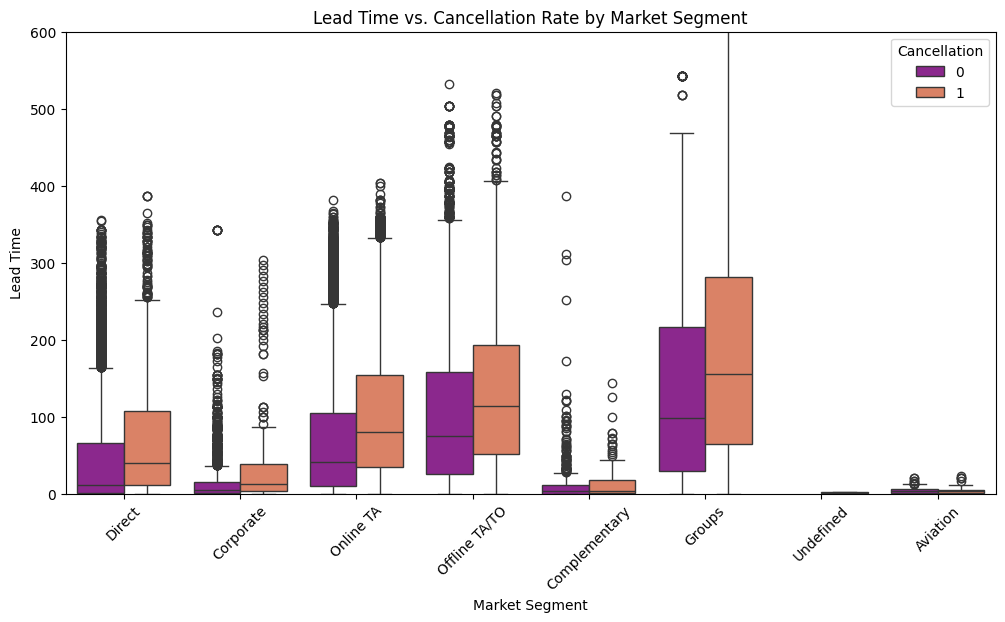

In [ ]:
# 19. Lead Time vs. Cancellation Rate by Market Segment
plt.figure(figsize=(12,6))
sns.boxplot(data=df_booking, x='market_segment', y='lead_time', hue='is_canceled', palette='plasma')
plt.ylim(0, 600)
plt.xlabel('Market Segment')
plt.ylabel('Lead Time')
plt.title('Lead Time vs. Cancellation Rate by Market Segment')
plt.xticks(rotation=45)
plt.legend(title='Cancellation')
plt.show()

##### 1. Why did you pick this specific chart?

- A boxplot is ideal for analyzing the distribution of lead times across different market segments while incorporating cancellation behavior.
- It helps in identifying trends and outliers in lead times for both canceled and non-canceled bookings.
- The hue parameter distinguishes cancellations (0 = Not Canceled, 1 = Canceled), making it easy to compare patterns across market segments.

##### 2. What is/are the insight(s) found from the chart?

- Cancellations are more common for bookings with long lead times.

    - Market segments like Online TA (Online Travel Agents) and Direct - bookings have significantly higher median lead times for canceled bookings.
    - Customers booking months in advance are more likely to cancel.

- Corporate and Complementary bookings have the shortest lead times.

    - These segments rarely book far in advance, leading to lower cancellation rates.
    - Since corporate travelers often book last minute, they are less likely to cancel.

- Transient customers cancel the most, while contract-based bookings are the most stable.

    - Transient segment bookings tend to have a higher spread in lead time, meaning they include both early and last-minute reservations, contributing to unpredictability.
    - Contract bookings (e.g., business deals) have the lowest lead time variability, meaning they are more reliable

##### 3. Will the gained insights help create a positive business impact?

Yes!

- Hotels can offer incentives for long-lead-time bookings (e.g., discounts for non-refundable reservations) to reduce cancellations.
- Dynamic pricing strategies can be used to increase last-minute booking revenue while maintaining occupancy levels.
- Corporate and group bookings should be prioritized as they have the lowest cancellation risks and provide stable revenue.

##### 4. Are there any insights that lead to negative growth?

- Over-reliance on long lead-time bookings can cause fluctuations in occupancy rates due to cancellations.
- Strict cancellation policies might discourage advance bookings, affecting overall revenue.
- A large number of last-minute cancellations in Online TA and Direct segments may indicate issues like price sensitivity or competitor availability.

#### Chart - 20 -  Deposit Type vs. Cancellation Rate by Hotel Type

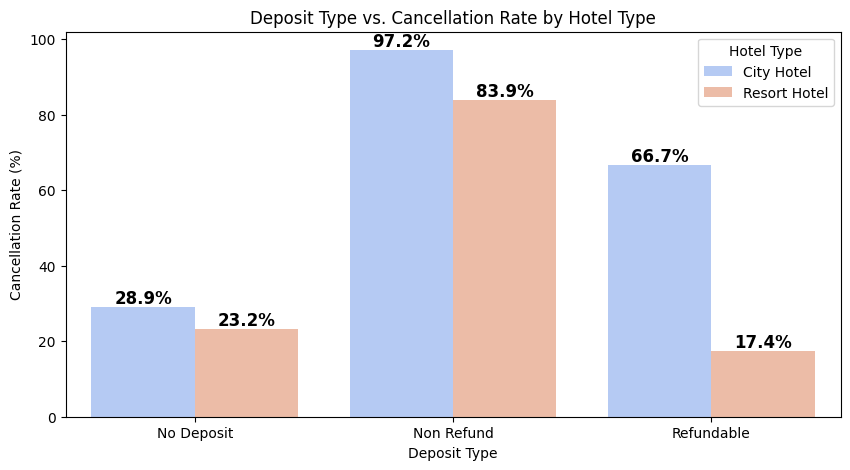

In [ ]:
# Calculate mean cancellation rate for each Deposit Type & Hotel Type
cancellation_rates = df_booking.groupby(['deposit_type', 'hotel'])['is_canceled'].mean().reset_index()

# Convert cancellation rate to percentage
cancellation_rates['is_canceled'] *= 100

# Create the bar plot
plt.figure(figsize=(10,5))
ax = sns.barplot(data=cancellation_rates, x='deposit_type', y='is_canceled', hue='hotel', palette='coolwarm')

# Annotate the bars with exact percentages
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Labels and title
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate (%)')
plt.title('Deposit Type vs. Cancellation Rate by Hotel Type')
plt.legend(title='Hotel Type')

plt.show()



##### 1. Why did you pick this specific chart?

- A grouped bar chart provides a clearer comparison of cancellation rates between different deposit types for each hotel type.
- The height of the bars directly represents the cancellation rate, making it easy to interpret.
- Hue differentiation by hotel type allows us to see how deposit policies affect cancellations in different types of hotels.

##### 2. What is/are the insight(s) found from the chart?

- No Deposit Bookings

    - Guests who book without a deposit cancel moderately (~24-28%).
  This is expected since there is no financial commitment from the guest.
    - City Hotels have a slightly higher cancellation rate than Resort Hotels.

- Refundable Deposit Bookings (Cancellation Rate Varies by Hotel Type)

    - City Hotels: Refundable bookings show a slightly higher cancellation rate (66.7%).
    - Resort Hotels: Refundable bookings have a lower cancellation rate (17.4%).
    - Possible reason: Resort hotel guests may be planning vacations, making them more committed to their stay.

- Non-Refundable Bookings (~84-97% Cancellation Rate)

    - Surprisingly, non-refundable bookings have an extremely high cancellation rate.
    - This is unexpected, since guests should lose money if they cancel.
   Potential explanations:
        - Fraudulent bookings or system errors.
        - Guests making multiple bookings and later canceling non-refundable ones due to flexible travel policies.

    - This might need deeper investigation!

##### 3. Will the gained insights help create a positive business impact?

- Hotels can adjust their deposit policies based on customer behavior:

    - Increase flexible policies for Resort Hotels (since refundable deposits have low cancellations).
    - Introduce stricter policies for City Hotels, especially for refundable bookings.
    - Investigate the high cancellation rate for non-refundable bookings to prevent revenue leakage.

-  Dynamic pricing strategy:

    - Hotels may charge slightly more for refundable bookings due to the higher cancellation risk.
    - Offer discounts on non-refundable bookings to encourage real, committed bookings.

##### 4. Are there any insights that could lead to negative growth?

- Strict deposit policies may discourage bookings

   - If hotels make refundable bookings more expensive, it may reduce their attractiveness.
   - Some guests may avoid booking altogether if cancellation penalties are too high.

- Possible system loophole for non-refundable bookings

   - If non-refundable bookings are actually being canceled, this could indicate a loophole where guests can still cancel without consequences.
   - Hotels need to check if they are truly enforcing non-refundable policies

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

#### 1. Predict Guest Needs and Preferences

- **Personalized Booking Experience:**

    - Guests who make special requests tend to have higher ADR (premium travelers). Hotels should provide personalized upselling options based on these preferences.

    - Families and groups have different booking behaviors compared to solo travelers. Custom packages and promotions should be designed for each segment.

- **Cancellation Trends & Prevention:**

    - High lead times correlate with increased cancellation rates. Introducing flexible yet incentivized non-refundable policies can reduce these cancellations.

    - Transient customers have the highest cancellation rates. Hotels should focus on loyalty programs to improve retention.

#### 2. Optimize Booking Efficiency

- **Revenue & Pricing Strategy:**

    - Last-minute bookings often have higher ADR. Dynamic pricing strategies should be implemented to maximize revenue for such bookings.

    - Market segments such as Online Travel Agents (OTA) and Direct bookings yield higher ADR. Hotels should optimize marketing spend to attract these customers.

- **Minimizing Overbooking Risks:**

    - Non-refundable deposits drastically reduce cancellations. Offering discounts for non-refundable early bookings can stabilize revenue.

    - Seasonal patterns suggest peak booking times. Resource allocation (staff, amenities) should be adjusted accordingly.

#### 3. Tailor Offerings to Market Segments

- **Strategic Customer Targeting:**

    - Contract customers show the lowest cancellation rates. Corporate partnerships should be expanded to ensure a steady occupancy rate.

    - Groups and transient-party customers have moderate cancellations. Hotels should refine group booking policies to reduce last-minute cancellations.

- **Enhanced Customer Retention:**

    - Resort hotels see fewer cancellations compared to city hotels. Long-term offers for resort stays can attract more stable revenue.

    - Refundable bookings have a relatively low cancellation rate for resort hotels. This can be used as a competitive advantage to attract cautious travelers.

# **Conclusion**

Through exploratory data analysis, we identified critical factors influencing hotel booking behaviors. By implementing these data-driven recommendations, hotels can optimize revenue, minimize cancellations, and improve customer satisfaction. Further predictive modeling can refine strategies for even more precise decision-making in future optimizations.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***